# Chapter 2: Current frequency of threshold exceedance

In this chapter the current frequency of exceeding the threshold determined in chapter 1 wil be analysed. This is done by looking at the available observation data of the catchment area of the Wien River. This observation data is available through eWaterCycle. As determined in chapter 1, the Wien River is designed for a 1000-year discharge return period. The observation data is unlikely to cover a period of 1000 years, so we will need to extrapolate it to estimate the discharge corresponding to a 1000-year return period and determine the return period of the previously established threshold. 

## General

In [158]:
# First of all, some general python and eWaterCycle libraries need to be imported.
# general python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

#niceties
from rich import print
import seaborn as sns
sns.set()

# general eWaterCycle
import ewatercycle
import ewatercycle.models
import ewatercycle.forcing

eWaterCycle provides access to the Caravan dataset. This dataset contains data on rainfall, potential evaporation and discharge for all the catchments in the different Camel datasets. The Caravan dataset contains a Camel dataset of the catchment of the Wien River. This catchment area is loaded below:

In [159]:
camelsgb_id = "lamah_208082"

In [160]:
# The start and end date of the experiment need to be specified. The start and end date of the available observation data are determined further below
experiment_start_date = "1981-08-01T00:00:00Z"
experiment_end_date = "2020-12-31T00:00:00Z"

In [161]:
# The forcing data can be generated or previously generated data can be loaded:
forcing_path_caravan = Path.home() / "forcing" / camelsgb_id / "caravan"
forcing_path_caravan.mkdir(exist_ok=True, parents=True)

# If someone has prepared forcing for you, this path needs to be changed to that location. 
prepared_forcing_path_caravan_central = Path("location/of/forcing/data")

In [162]:
# option one: generate forcing data
# camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].generate(
#     start_time=experiment_start_date,
#     end_time=experiment_end_date,
#     directory=forcing_path_caravan,
#     basin_id=camelsgb_id,
# )


# option two or three: load data that you or someone else generated previously
camelsgb_forcing = ewatercycle.forcing.sources['CaravanForcing'].load(Path("/home/thirza/forcing/lamah_208082/caravan"))

# print(camelsgb_forcing)

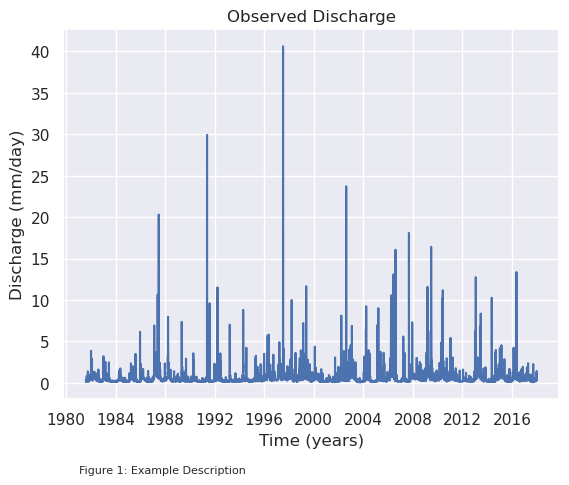

In [190]:
# The forcing data contains precipitation, potential evaporation, discharge and the near-surface temperatures (tas). 
# For determining the threshold exceedance frequency, only the discharge data are used. 
# The discharge data is loaded from the forcing below. The data contains the maximum discharge values per day.

ds_forcing = xr.open_mfdataset([camelsgb_forcing['Q'], ])
ds_forcing["Q"].plot()
plt.title('Observed Discharge')
plt.xlabel('Time (years)')
plt.ylabel('Discharge (mm/day)')
plt.text(0.2, -0.2, "Figure 1: Example Description", 
         ha="center", fontsize=8, transform=plt.gca().transAxes)
plt.show();

Since the threshold values determined in chapter 2 are in m3/s, the observed discharge data, now in mm/d, is converted to m3/s as well.

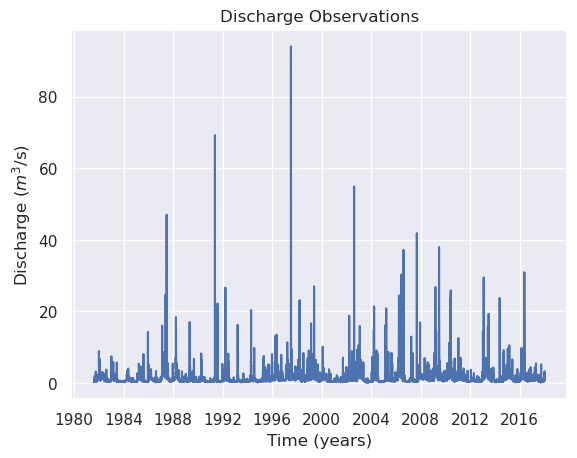

In [169]:
catchment_area = ds_forcing["area"].values

# go from mm/day to m3/s
discharge = []
for i in range(len(ds_forcing["Q"].values)):
    discharge.append((ds_forcing["Q"].values[i] * catchment_area * 1000) / (24 * 60 * 60))

x = ds_forcing["time"].values
y = discharge

plt.plot(x,y)
plt.xlabel('Time (years)')
plt.ylabel('Discharge ($m^3$/s)')
plt.title('Discharge Observations');

# plt.savefig("/home/thirza/BEPproject/book/Grafieken/observations.png", dpi=300)

The maximum discharge of the observed data can be extracted, and amounts to 94.05 m3/s.

In [170]:
# max(discharge)

94.05234565654797

The observed discharge data can be used to calculate the return periods of the normally distributed threshold values. This is done using the Generalized Extreme Value distribution. The return periods of the observed discharge data are shown with red dots in the graph below. A line is fitted through those points, and extrapolated to calculate the return period of the threshold value, which is not present in the observation data. 

In [27]:
# Find the maximum annual discharge
max_discharge = ds_forcing["Q"].groupby("time.year").max()
maxdischarge = max_discharge.values * catchment_area * 1000 / (24 * 60 * 60) #convert to m3/s
# print(maxdischarge)

In [28]:
# import scipy.stats as stats
# import math
# # # discharge data > 20 m³/s
# # data = [value for value in discharge if value > 20]

# # all discharge data
# cleaned_discharge = [x for x in discharge if not math.isnan(x)]
# data = cleaned_discharge

# # # maximum annual discharge
# # data = [x for x in maxdischarge if not math.isnan(x)]
# # # print(data)

# # Generalized Extreme Value (GEV) distribution 
# shape, loc, scale = stats.genextreme.fit(data)

# # Define threshold value
# threshold = 530

# # calculate exceedance probability in years
# p = 1 - stats.genextreme.cdf(threshold, shape, loc=loc, scale=scale)
# # calculate return period in years
# T = 1 / (p * 365.25)
# # print(T)

# # calculate change threshold exceedance at least once in 1000 and 1100 years
# P_1000 = 1 - (1 - p) ** 1000
# P_1100 = 1 - (1 - p) ** 1100

# # Results 1000
# print(f"Returnperiod for 530 m³/s: {T:.2f} years")
# print(f"Chance of at least one exceedance in 1000 years: {P_1000:.5f} ({P_1000 * 100:.2f}%)")
# print(f"Chance of at least one exceedance in 1100 years: {P_1100:.5f} ({P_1100 * 100:.2f}%)")

# # expected amount of times threshold is exceeded in 1000 years
# expected_exceedances1000 = 1000 / T if T > 0 else 0
# print(f"The discharge currently exceeds the threshold of 530 m³/s {expected_exceedances1000:.3f} times in 1000 years")

# # expected amount threshold is exceeded in 1100 years
# expected_exceedances1100 = 1100 / T if T > 0 else 0
# print(f"The discharge currently exceeds the threshold of 530 m³/s {expected_exceedances1100:.3f} times in 1100 years")

The daily discharge data has been plotted below to be able to see the return periods of the observed discharges. From these values, the returnperiods for the threshold values can later be extrapolated.

For a discharge of 530 m3/s, the return period is 640.908 years for fit all data

For a discharge of 530 m^3/s, the return period is 922.727 years for fit 1

For a discharge of 530 m^3/s, the return period is 729.261 years for fit 2

For a discharge of 530 m^3/s, the return period is 1117.978 years for fit 3

For a discharge of 530 m^3/s, the return period is 2098.402 years for fit 4

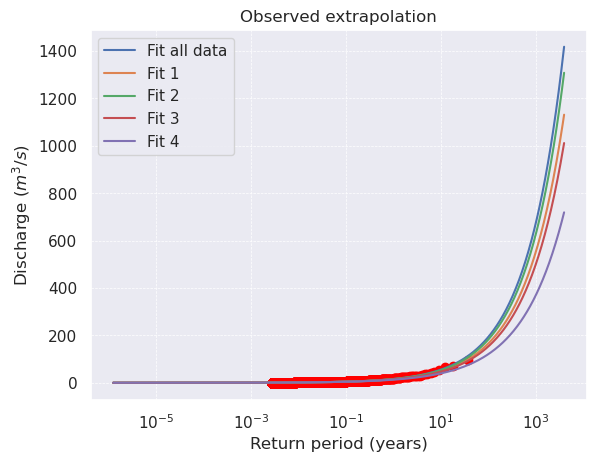

In [203]:
import scipy.stats as stats
import math
from scipy.optimize import curve_fit, fsolve
# # discharge data > 20 m³/s
# data = [value for value in discharge if value > 20]

# all discharge data
cleaned_discharge = [x for x in discharge if not math.isnan(x)]
data = cleaned_discharge


# print(data)

# # maximum annual discharge
# data = [x for x in maxdischarge if not math.isnan(x)]
# # print(data)

# scatter of data
# Sort data from high to low
sorted_data_scatter = np.sort(data)[::-1]
sorted_data = np.sort(data)[::-1]# Sorteer aflopend
n = len(sorted_data)
rank = np.arange(1, n + 1)
return_periods_days = (n + 1) / rank
return_periods_years_scatter = return_periods_days / 365.25

def power_law(x, a, b):
    return a * x ** b

def calculate_return_periods(sorted_data):
    n = len(sorted_data)
    rank = np.arange(1, n + 1)
    return_periods_days = (n + 1) / rank
    return_periods_years = return_periods_days / 365.25
    
    # Alleen de data voor returnperioden >= 0 behouden
    return_periods_years_subset = return_periods_years[return_periods_years >= 0]
    sorted_data_subset = sorted_data[return_periods_years >= 0]

    # Fit de power law functie
    params, _ = curve_fit(power_law, return_periods_years_subset, sorted_data_subset, maxfev=10000)
    a_opt, b_opt = params

    # Maak een fit voor de return period
    x_fit = np.logspace(np.log(min(return_periods_years_subset)), np.log(max(return_periods_years_subset)), 1000)
    y_fit = power_law(x_fit, a_opt, b_opt)

    return x_fit, y_fit, a_opt, b_opt

x_fit, y_fit, a_opt, b_opt = calculate_return_periods(sorted_data)

def find_x_for_y(y_target, a, b):
    return (y_target / a) ** (1 / b)
y_target = 530
x_value = find_x_for_y(y_target, a_opt, b_opt)
print(f"For a discharge of {y_target} m3/s, the return period is {x_value:.3f} years for fit all data")
plt.plot(x_fit, y_fit, label=f'Fit all data')


sorted_data_list = [np.delete(sorted_data, 0), np.delete(sorted_data, 1), np.delete(sorted_data, [0, 1]), np.delete(sorted_data, slice(0, 5))]

for i, sorted_data in enumerate(sorted_data_list):
    x_fit_less, y_fit_less, a_opt, b_opt = calculate_return_periods(sorted_data)

    def find_x_for_y(y_target, a, b):
        return (y_target / a) ** (1 / b)
    y_target = 530
    x_value = find_x_for_y(y_target, a_opt, b_opt)
    print(f"For a discharge of {y_target} m^3/s, the return period is {x_value:.3f} years for fit {i + 1}")
    plt.plot(x_fit_less, y_fit_less, label=f'Fit {i + 1}')



plt.xscale('log')
plt.scatter(return_periods_years_scatter, sorted_data_scatter, color="red")
plt.xlabel('Return period (years)')
plt.ylabel('Discharge ($m^3/s$)')

# plt.hlines(y_target, xmin=min(return_periods_years), xmax=x_value, colors='g', linestyles='dashed', label="y=530 Line")
# plt.vlines(x_value, ymin=0, ymax=y_target, colors='g', linestyles='dashed', label="Intersection to x-axis")
# plt.text(x_value, -50, f'{x_value:.0f} years', ha='right', fontsize=12, color='black')  # X-label net onder de as
# plt.text(min(return_periods_years) / 2, y_target, f'{y_target:.0f} $m^3/s$', va='center', fontsize=12, color='black')  # Y-label links naast lijn

plt.title('Observed extrapolation')
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.savefig("/home/thirza/BEPproject/book/Grafieken/scatterobs.png", dpi=300)

Below both the normal distribution of the exceedance threshold values and the return periods of discharges are plotted below. This graph shows the return period and the probability density are related to the discharge. A discharge value more to the right of the normal distribution, has a higher return period, but also has a longer probability of actually causing flooding of the U4 subway line.

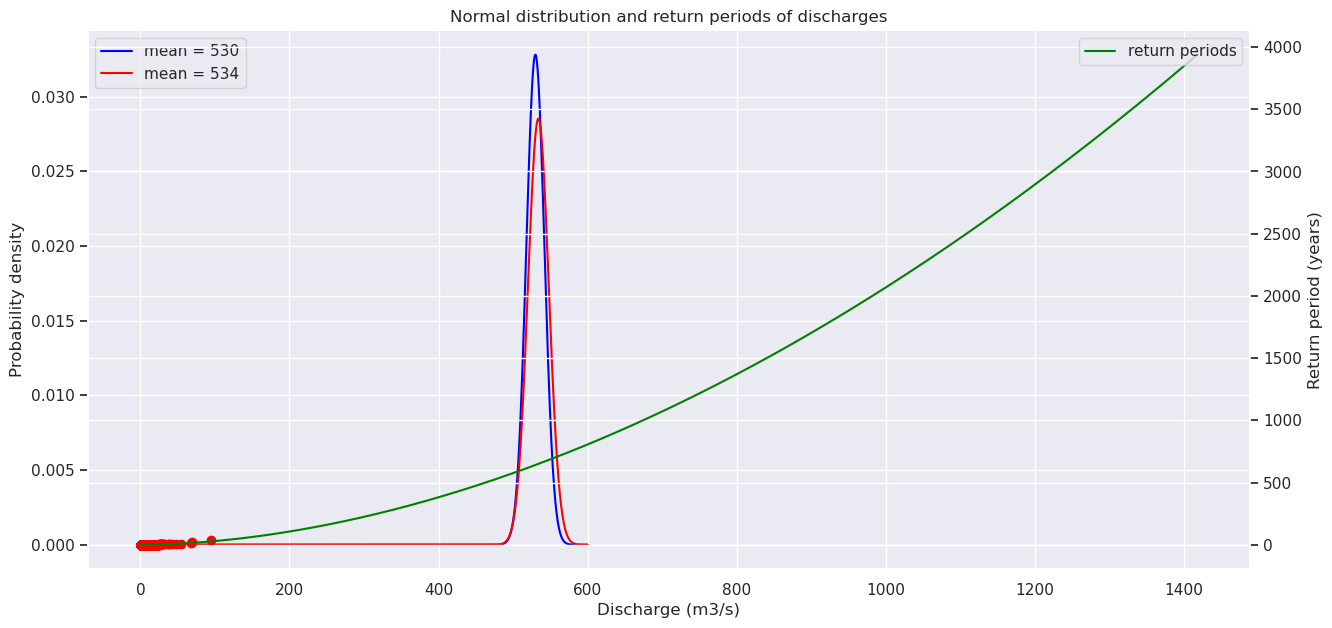

In [199]:
#1
mean = 530
p5 = 510  # 5th percentile
p95 = 550  # 95th percentile

#Calculate standard deviation
z_5 = stats.norm.ppf(0.05)  # -1.645
z_95 = stats.norm.ppf(0.95)  # 1.645
std_dev = (p95 - mean) / z_95  # σ = (550 - 530) / 1.645
x = np.linspace(0, 600, 1000)
y = stats.norm.pdf(x, mean, std_dev)

#2
mean_2 = 534
p5_2 = 511  # 5th percentile
p95_2 = 557  # 95th percentile

#Calculate standard deviation
z_5 = stats.norm.ppf(0.05)  # -1.645
z_95 = stats.norm.ppf(0.95)  # 1.645
std_dev_2 = (p95_2 - mean_2) / z_95  # σ = (550 - 530) / 1.645
x_2 = np.linspace(0, 600, 1000)
y_2 = stats.norm.pdf(x_2, mean_2, std_dev_2)


fig, ax1 = plt.subplots(figsize=(15, 7))

# ax1.plt.figure(figsize=(8, 5))
ax1.plot(x, y, label="mean = 530", color='blue')
ax1.plot(x_2, y_2, label="mean = 534", color='red')

# # Mark the 5th and 95th percentiles
# plt.axvline(p5, color='red', linestyle='dashed')
# plt.axvline(p95, color='red', linestyle='dashed')
# plt.axvline(mean, color='orange', linestyle='dashed')
# plt.axvline(p5_2, color='green', linestyle='dashed')
# plt.axvline(p95_2, color='green', linestyle='dashed')
# plt.axvline(mean_2, color='orange', linestyle='dashed')
# discharge_threshold = np.linspace(0.0001, 600, 601)

ax1.set_xlabel("Discharge (m3/s)")
ax1.set_ylabel("Probability density")

# Make second axis
ax2 = ax1.twinx()

ax2.plot(y_fit, x_fit, label="return periods", color='green')
ax2.set_ylabel("Return period (years)")
ax2.tick_params(axis='y')

ax2.scatter(sorted_data_scatter, return_periods_years_scatter, color="red")

plt.title(f"Normal distribution and return periods of discharges")
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Toon de plot
plt.grid(True)
plt.show()